# **Outgassing Materials EDA**

## Contents

1. **Introduction - About Data**

2. **Business Aspects of the Project**

3. **Exploratory Data Analysis (EDA)**
    - Overall correlation analysis
    - Visualizations and initial insights
        - Material Performance Analysis
        - Supplier Analysis
        - Material Usage Patterns
4. **Findings and Insights**
    - Summary of findings and implications

# **1. Introduction - About Data**

The dataset "Outgassing Db" on NASA's Open Data Portal provides information on materials that have been tested for outgassing, 
which is the release of gas that was dissolved, trapped, frozen, or absorbed in some material. 

The database includes material descriptions, test conditions, and results of total mass loss (TML) and collected volatile condensable materials (CVCM).

# **2. Business Aspects of the Project:**

**Objective:** Evaluate the performance of different materials based on the test values of materials they provide.

**Outcome:** Use ML methods to create a material performance evaluation framework to consistently monitor and assess material reliability and material quality.

**Impact:** This framework will help in making informed decisions about Material selection ensuring the procurement of high-quality materials.

## Learning about the dataset

1. **Sample Material**: This column describes the material of the sample being tested. It includes information about the composition and form of the material, such as tapes, films, adhesives, etc.
2. **ID**: A unique identifier for each sample, used for tracking and reference.

1. **MFR**: Manufacturer code or name, indicating the company that produced the material.
2. **TML (Total Mass Loss)**: This measures the percentage of a material's mass lost during a test where the material is exposed to a high vacuum and temperature (125°C) for 24 hours. It is a key parameter for evaluating the material's stability in such conditions. A lower TML indicates better performance in vacuum environments【11†source】【12†source】.
3. **Category**: A numerical code that categorizes the material based on its type or use, such as adhesives, tapes, or coatings.
4. **CVCM (Collected Volatile Condensable Material)**: This parameter measures the percentage of volatile material that can condense on a cold surface during the outgassing test. Materials with lower CVCM values are preferable for high-vacuum environments, as they release fewer contaminants that can condense on critical surfaces【11†source】【13†source】.
5. **Space Code**: This likely refers to a code indicating the suitability or rating of the material for space applications, though specific details may vary.
6. **WVR (Water Vapor Regained)**: This measures the amount of water vapor a material regains after the TML and CVCM tests. It indicates how much moisture the material can absorb back under normal atmospheric conditions【13†source】.
7. **Material Usage**: Describes the typical application or usage of the material, such as for blankets, tapes, or adhesives.
8. **Cure**: Information about the curing process of the material, which could include details about whether the material is cured or uncured, and the conditions under which it was cured if applicable.

### Categories

Dictionary of Category

1. **Adhesives**:
    - Includes various types like film adhesives, conductive adhesives, and foam adhesives.
2. **Conformal Coatings**:
    - Protective coatings applied to electronic components.
3. **Tapes**:
    - Includes different types of tapes such as electrical tape, thermal tape, and adhesive transfer tape.
4. **Marking Materials**:
    - Materials used for labeling and marking, including high-temperature labels and shrink tubing.
5. **Greases and Lubricants**:
    - Materials used for lubrication in spacecraft mechanisms.
6. **Paints and Coatings**:
    - Includes thermal control paints and other protective coatings.
7. **Potting Compounds**:
    - Materials used to encapsulate electronic components.
8. **Sealants and Sealant Compounds**:
    - Used for sealing purposes, ensuring air-tight and water-tight applications.
9. **Structural Materials**:
    - Includes composites, metals, and other materials used in the structural components of spacecraft.
10. **Thermal Insulation**:
    - Materials used for thermal protection, such as thermal blankets and tapes.
11. **Electrical Insulation**:
    - Insulating materials for electrical components.
12. **Films and Laminates**:
    - Thin layers of materials used for various applications, including insulation and protection.
13. **Foams**:
    - Lightweight materials used for cushioning and insulation.
14. **Elastomers and O-rings**:
    - Rubber-like materials used for seals and gaskets.
15. **Optical Materials**:
    - Includes materials used in optical systems, such as lenses and mirrors.
16. **Conductive Materials**:
    - Materials that conduct electricity, used in grounding and shielding applications.
17. **Biological Materials**:
    - Materials used in life support systems and biological experiments.
18. **Miscellaneous**:
    - Any other materials that do not fit into the above categories but are used in spacecraft applications.

### Imports (Always run before starting)

In [83]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.lines as mlines

For Logging

In [84]:
import gossipcat as gc


log_name = 'NASA_Materials_Project_EDA'
log_file = r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_2\project_NASA_Materials_Project\log\NASA_Materials_Project_EDA.log'

logger = gc.get_logger(logName=log_name, logFile=log_file)


In [85]:
csv = r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_2\project_NASA_Materials_Project\data\result\cleaned_Outgassing_Db_20240702.csv'
data = pd.read_csv(csv)

material_df = pd.DataFrame(data)


In [86]:
material_df

,ID,Sample Material,MFR,TML,Category,CVCM,Space Code,WVR,Material Usage
0,GSC33214,"""V"" MATERIAL IN CLICKBOND CB4023V, GLASS/PEI -...",CLB,0.37,12,0.00,1.0,0.35,CLICKBOND
1,GSC33217,"""VC"" MATERIAL IN CLICKBOND CB9257VC, CARBON FI...",CLB,0.52,12,0.00,1.0,0.28,CLICKBOND
2,GSC34174,0667 BLACK EPDM,PRS,0.65,15,0.13,1.0,0.07,ORING
3,GSC33829,1 INCH COPPER TAPE,MMM,0.24,16,0.08,1.0,0.01,TAPE
4,GSC33397,"100 DUN-LAM, GE COATED BLACK KAPTON XC",DUN,0.89,6,0.01,1.0,0.67,COND BLANKET FILM
...,...,...,...,...,...,...,...,...,...
7554,GSC11657,ZYTEL 101L BLACK EXTRUDED RODS,DUP,1.19,4,0.00,1.0,0.36,CONN INSUL
7555,GSC16742,ZYTEL 101L WHITE MODIFIED NYLON 66,DUP,1.14,12,0.01,1.0,0.29,MOLD CPND
7556,GSC17898,ZYTEL 70G33HRLUG59D14 262-060-02 OLIVE DRAB,UNN,0.81,12,0.03,1.0,0.46,MOLD CPND
7557,GSC17900,ZYTEL 70GSSHRLUG59D14 262-060-04 BLACK,UNN,0.81,12,0.04,1.0,0.47,MOLD CPND


## 3. **Exploratory Data Analysis (EDA)**

## Overall correlation analysis

In [87]:
#selecting numerical columns for overall statistics
material_df.select_dtypes(include=['number']).describe()

,TML,Category,CVCM,Space Code,WVR
count,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000
mean,0.741569,10.823389,0.058144,1.168541,0.186828
std,0.706367,19.566800,0.075064,0.472487,0.193611
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.000000,0.010000,1.000000,0.030000
50%,0.530000,6.000000,0.020000,1.000000,0.120000
75%,1.000000,13.000000,0.080000,1.000000,0.280000
max,4.110000,99.000000,0.330000,9.000000,0.800000


In [88]:
material_df.shape

(7559, 9)

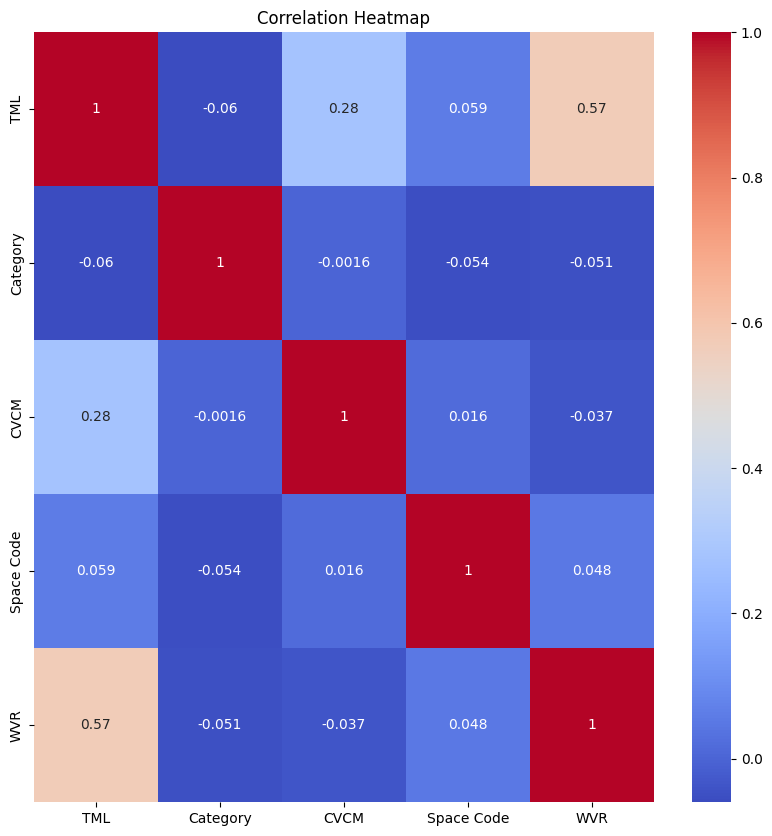

In [89]:
# heatmap for overall correlation
plt.figure(figsize=(10, 10))

sns.heatmap(material_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

- TML and WVR: The strongest positive correlation (0.57) exists between TML and WVR. This indicates that materials with higher TML also tend to have higher WVR values

In [90]:
#extract nuimerical columns
num_columns = material_df.select_dtypes(include=['number'])
correlation = num_columns.corr()

#unstack for information on top corr
corr_unstack = correlation.unstack()
corr_material_df = pd.DataFrame(corr_unstack, columns = ['Correlation'])

#resetting index and sorting
corr_material_df.reset_index(inplace=True)
corr_material_df = corr_material_df[corr_material_df['level_0']!= corr_material_df['level_1']]

corr_material_df_sorted = corr_material_df.sort_values(by='Correlation', ascending=False)

print(correlation)
print(f'\n {corr_material_df_sorted.head(10)}')

                 TML  Category      CVCM  Space Code       WVR
TML         1.000000 -0.060049  0.278984    0.058946  0.570555
Category   -0.060049  1.000000 -0.001648   -0.054097 -0.050661
CVCM        0.278984 -0.001648  1.000000    0.015760 -0.037400
Space Code  0.058946 -0.054097  0.015760    1.000000  0.048383
WVR         0.570555 -0.050661 -0.037400    0.048383  1.000000

        level_0     level_1  Correlation
4          TML         WVR     0.570555
20         WVR         TML     0.570555
2          TML        CVCM     0.278984
10        CVCM         TML     0.278984
3          TML  Space Code     0.058946
15  Space Code         TML     0.058946
23         WVR  Space Code     0.048383
19  Space Code         WVR     0.048383
17  Space Code        CVCM     0.015760
13        CVCM  Space Code     0.015760


In [91]:
logger.info('Correlation Analysis Finished')

2024-07-07 15:49:32,996 NASA_Materials_Project_EDA | INFO -> Correlation Analysis Finished
2024-07-07 15:49:32,996 NASA_Materials_Project_EDA | INFO -> Correlation Analysis Finished
2024-07-07 15:49:32,996 NASA_Materials_Project_EDA | INFO -> Correlation Analysis Finished
2024-07-07 15:49:32,996 NASA_Materials_Project_EDA | INFO -> Correlation Analysis Finished


## Visualsations and initial insights

### Material Performance Analysis

Distribution of TML

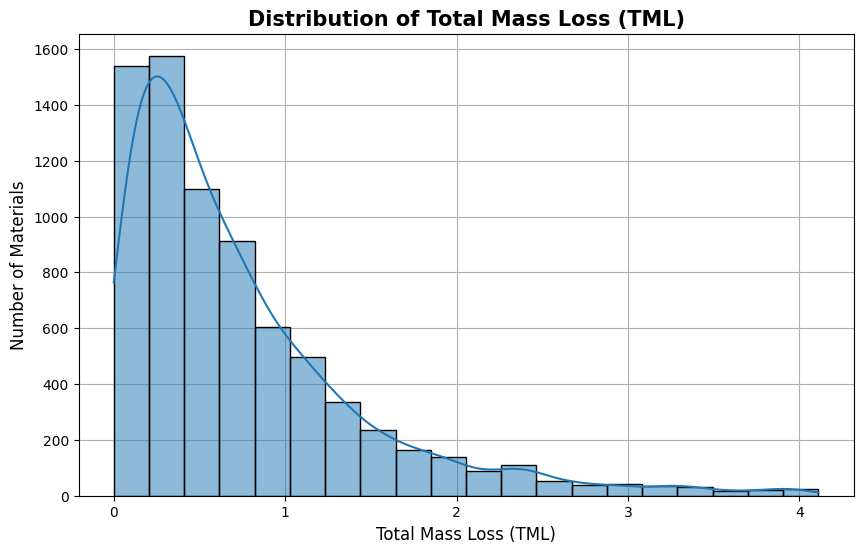

In [92]:
plt.figure(figsize=(10,6))
sns.histplot(material_df['TML'], bins=20, kde=True, zorder=2)
plt.title('Distribution of Total Mass Loss (TML)', fontweight='bold', fontsize=15)
plt.xlabel('Total Mass Loss (TML)', fontsize=12)
plt.ylabel('Number of Materials', fontsize=12)
plt.grid(zorder=1)
plt.show()


- The histogram shows that the majority of materials have a low TML, with a significant number of materials having TML values close to zero.
- The frequency decreases as TML increases, indicating that materials with higher TML are less common.

Distribution of CVCM

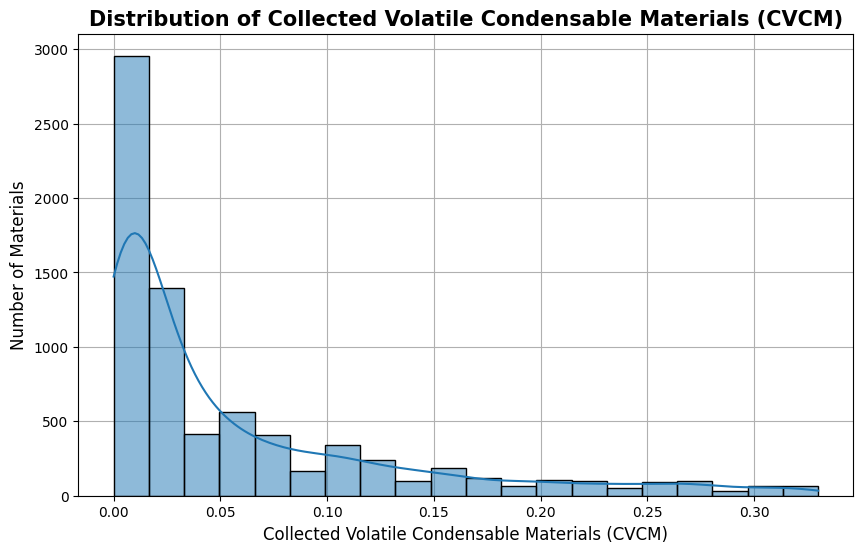

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(material_df['CVCM'], bins=20, kde=True, zorder=2)
plt.title('Distribution of Collected Volatile Condensable Materials (CVCM)', fontweight='bold', fontsize=15)
plt.xlabel('Collected Volatile Condensable Materials (CVCM)', fontsize=12)
plt.ylabel('Number of Materials', fontsize=12)
plt.grid(zorder=1)
plt.show()


- Histogram for CVCM displays a similar pattern to TML, where most materials have very low CVCM values, clustering near zero.
- The frequency drops sharply as CVCM values increase, suggesting that high CVCM values are rare.

Distribution of WVR

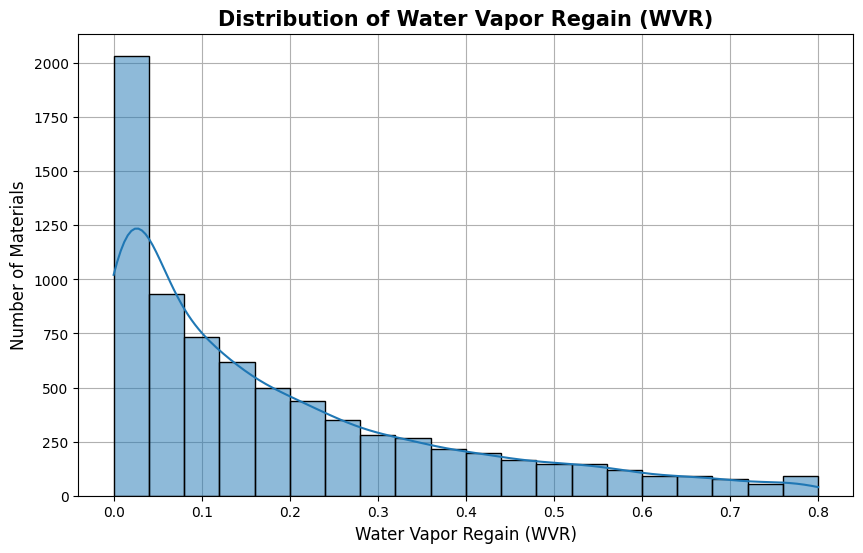

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(material_df['WVR'], bins=20, kde=True, zorder=2)
plt.title('Distribution of Water Vapor Regain (WVR)', fontweight='bold', fontsize=15)
plt.xlabel('Water Vapor Regain (WVR)', fontsize=12)
plt.ylabel('Number of Materials', fontsize=12)
plt.grid(zorder=1)
plt.show()

- The WVR distribution shows that the majority of materials have WVR values close to zero, with the frequency decreasing as WVR increases.
- This indicates that most materials do not significantly regain water vapor.

Average by Category

In [95]:
#mapping category to names
category_names = {1: 'Adhesives',
                  2: 'Conformal Coatings',
                  3: 'Tapes',
                  4: 'Marking Materials',
                  5: 'Greases and Lubricants',
                  6: 'Paints and Coatings',
                  7: 'Potting Compounds',
                  8: 'Sealants and Sealant Compounds',
                  9: 'Structural Materials',
                  10: 'Thermal Insulation',
                  11: 'Electrical Insulation',
                  12: 'Films and Laminates',
                  13: 'Foams',
                  14: 'Elastomers and O-rings',
                  15: 'Optical Materials',
                  16: 'Conductive Materials',
                  17: 'Biological Materials',
                  18: 'Miscellaneous'
                  }
#creating category_name
material_df['category_name'] = material_df['Category'].map(category_names)

#order TML
order_tml = material_df.groupby('category_name')['TML'].mean().sort_values(ascending=False).index.tolist()
#order WVR
order_wvr = material_df.groupby('category_name')['WVR'].mean().sort_values(ascending=False).index.tolist()   
#order CVCM
order_cvcm = material_df.groupby('category_name')['CVCM'].mean().sort_values(ascending=False).index.tolist()                       


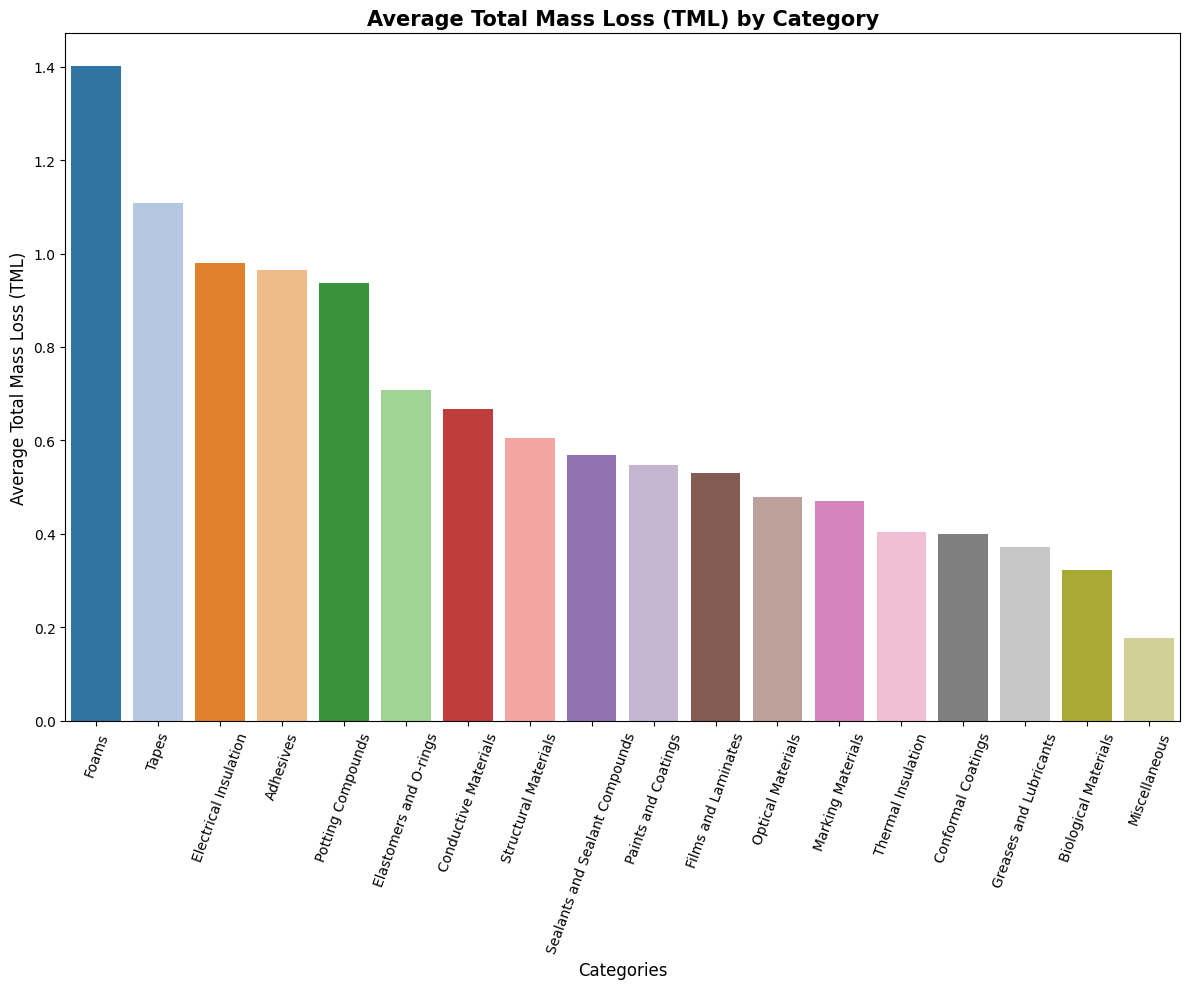

In [96]:
plt.figure(figsize=(12,10))
sns.barplot(x='category_name', y='TML', data=material_df, palette='tab20', errorbar=None, order=order_tml)
plt.title('Average Total Mass Loss (TML) by Category', fontweight='bold', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Total Mass Loss (TML)', fontsize=12)

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


- The bar chart shows that Foams have the highest average TML, followed by Tapes and Electrical Insulation. 
- Categories like Miscellaneous and Biological Materials have the lowest average TML, indicating their better performance in terms of lower mass loss.

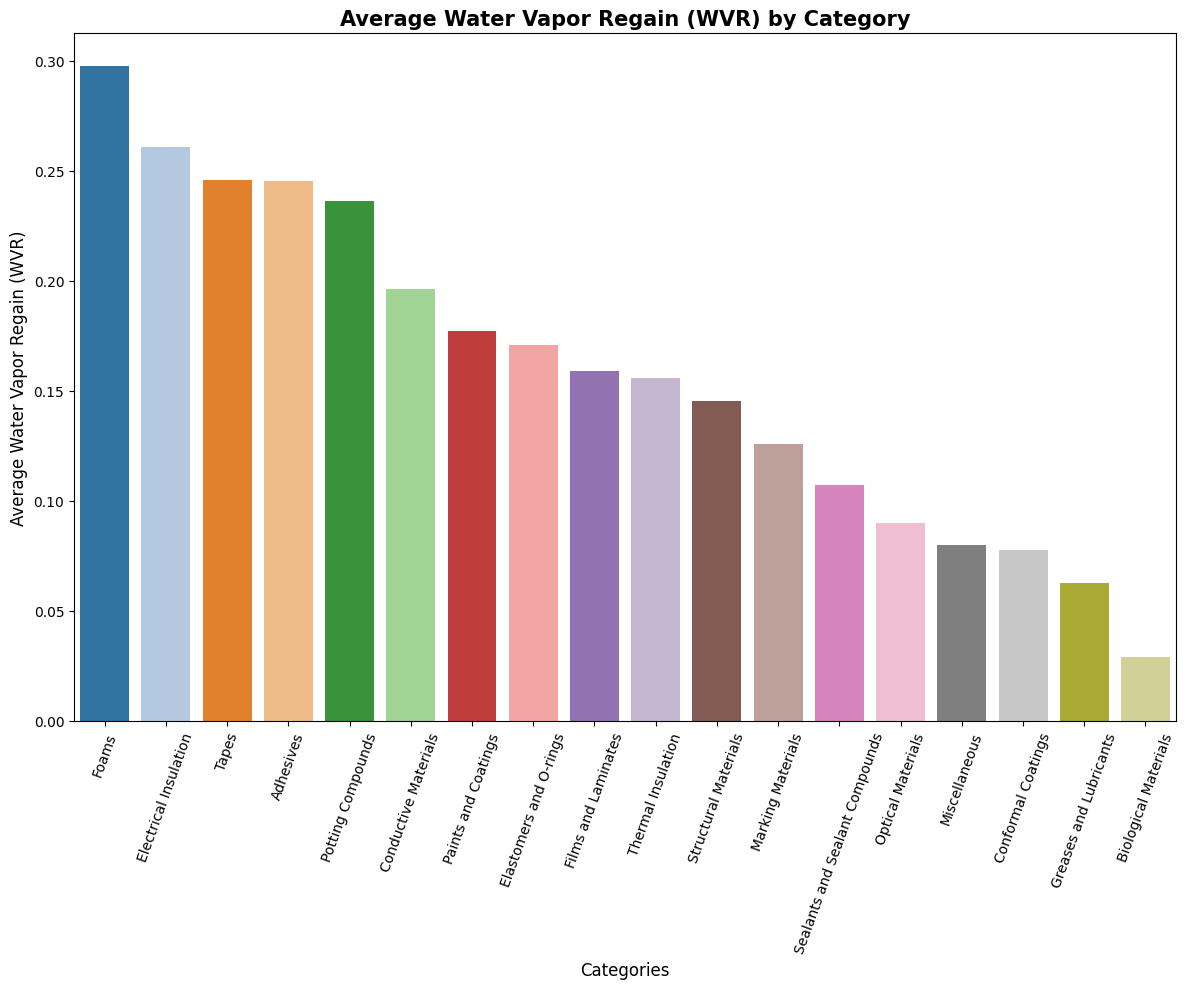

In [97]:
plt.figure(figsize=(12,10))
sns.barplot(x='category_name', y='WVR', data=material_df, palette='tab20', errorbar=None, order=order_wvr)
plt.title('Average Water Vapor Regain (WVR) by Category', fontweight='bold', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Water Vapor Regain (WVR)', fontsize=12)

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

- Similar to the TML chart, Foams have the highest average WVR, followed by Electrical Insulation and Tapes. 
- Categories like Biological Materials and Miscellaneous have the lowest WVR, indicating less moisture absorption.

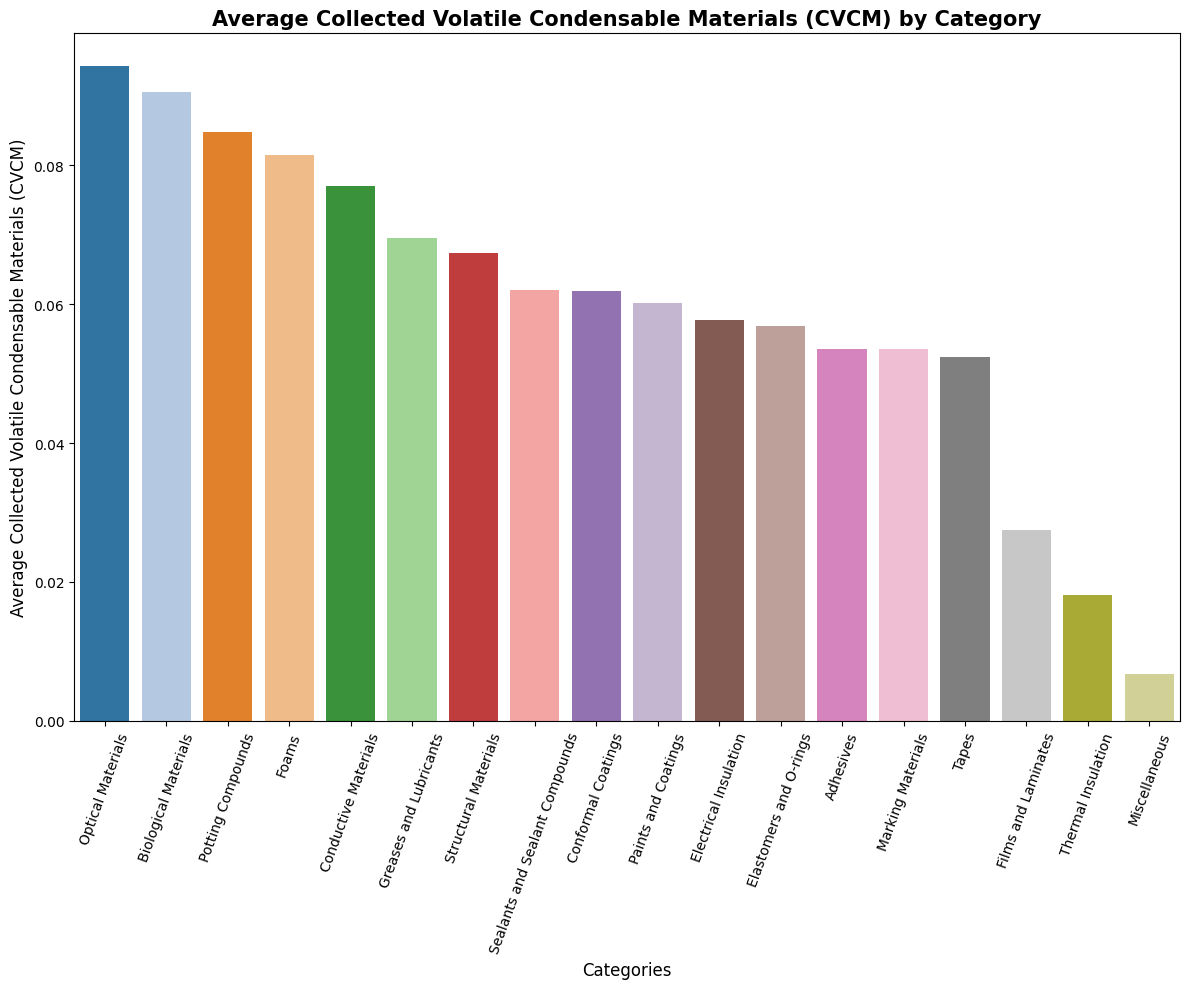

In [98]:
plt.figure(figsize=(12,10))
sns.barplot(x='category_name', y='CVCM', data=material_df, palette='tab20', errorbar=None, order=order_cvcm)
plt.title('Average Collected Volatile Condensable Materials (CVCM) by Category', fontweight='bold', fontsize=15)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Collected Volatile Condensable Materials (CVCM)', fontsize=12)

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

- Optical Materials and Biological Materials have the highest average CVCM values, indicating higher condensable volatile material loss. 
- Categories like Thermal Insulation and Miscellaneous have the lowest average CVCM, showing better performance in terms of lower volatile condensable material loss.

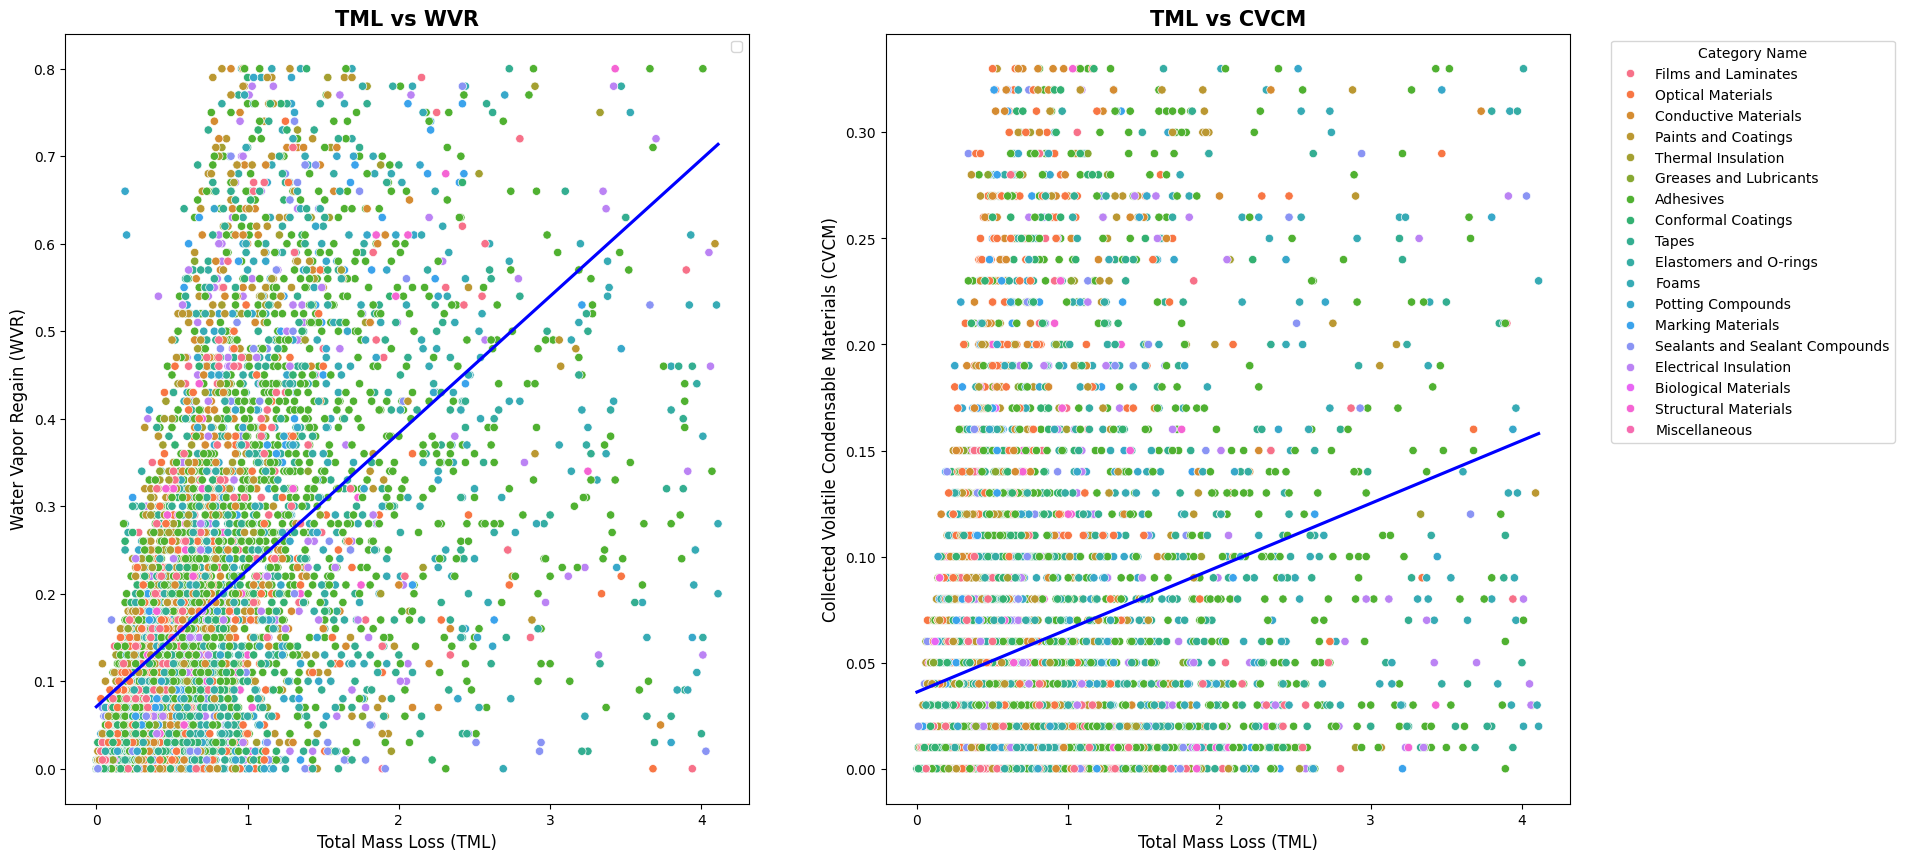

In [99]:
plt.figure(figsize=(30, 10))

# First scatter plot: TML vs WVR
plt.subplot(1, 3, 1)
sns.scatterplot(x='TML', y='WVR', data=material_df, hue='category_name', legend=False)
sns.regplot(x='TML', y='WVR', data=material_df, scatter=False, color='blue', ci=None)
plt.title('TML vs WVR', fontweight='bold', fontsize=15)
plt.xlabel('Total Mass Loss (TML)', fontsize=12)
plt.ylabel('Water Vapor Regain (WVR)', fontsize=12)
plt.legend()

# Second scatter plot: TML vs CVCM
plt.subplot(1, 3, 2)
sns.scatterplot(x='TML', y='CVCM', data=material_df, hue='category_name')
sns.regplot(x='TML', y='CVCM', data=material_df, scatter=False, color='blue', ci=None)
plt.title('TML vs CVCM', fontweight='bold', fontsize=15)
plt.xlabel('Total Mass Loss (TML)', fontsize=12)
plt.ylabel('Collected Volatile Condensable Materials (CVCM)', fontsize=12)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- The scatter plot shows a diverse distribution of materials across different TML, WVR, and CVCM values. 
- General positive correlation between TML vs WVR and TML vs CVCM, indicating that materials with high TML generally have high WVR and CVCM.

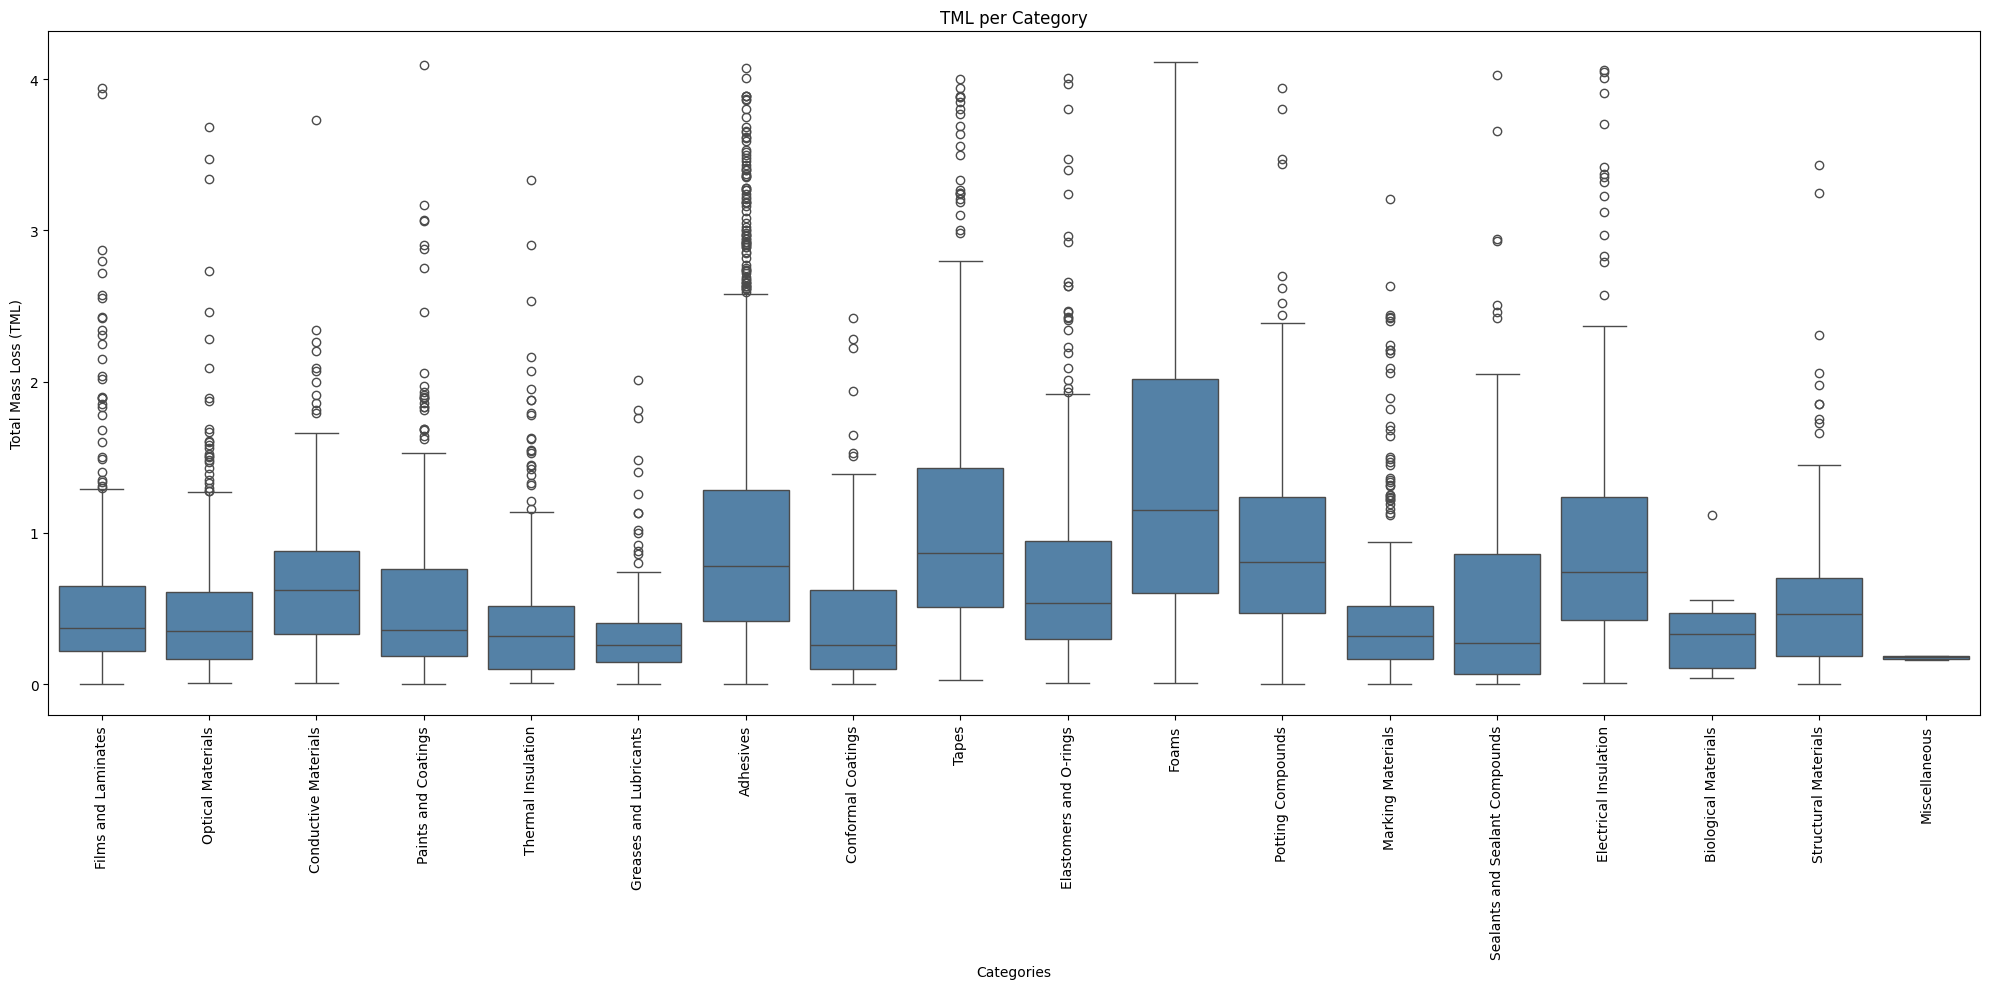

In [100]:
plt.figure(figsize=(20,10))
sns.boxplot(x='category_name', y='TML', data=material_df, color='steelblue')
plt.title('TML per Category')
plt.xlabel('Categories')
plt.ylabel('Total Mass Loss (TML)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The box plot shows that Foams and Electrical Insulation have higher median TML values, with notable variability and outliers. 
- Categories like Biological Materials and Miscellaneous have lower median TML values, indicating more stable performance with less mass loss.

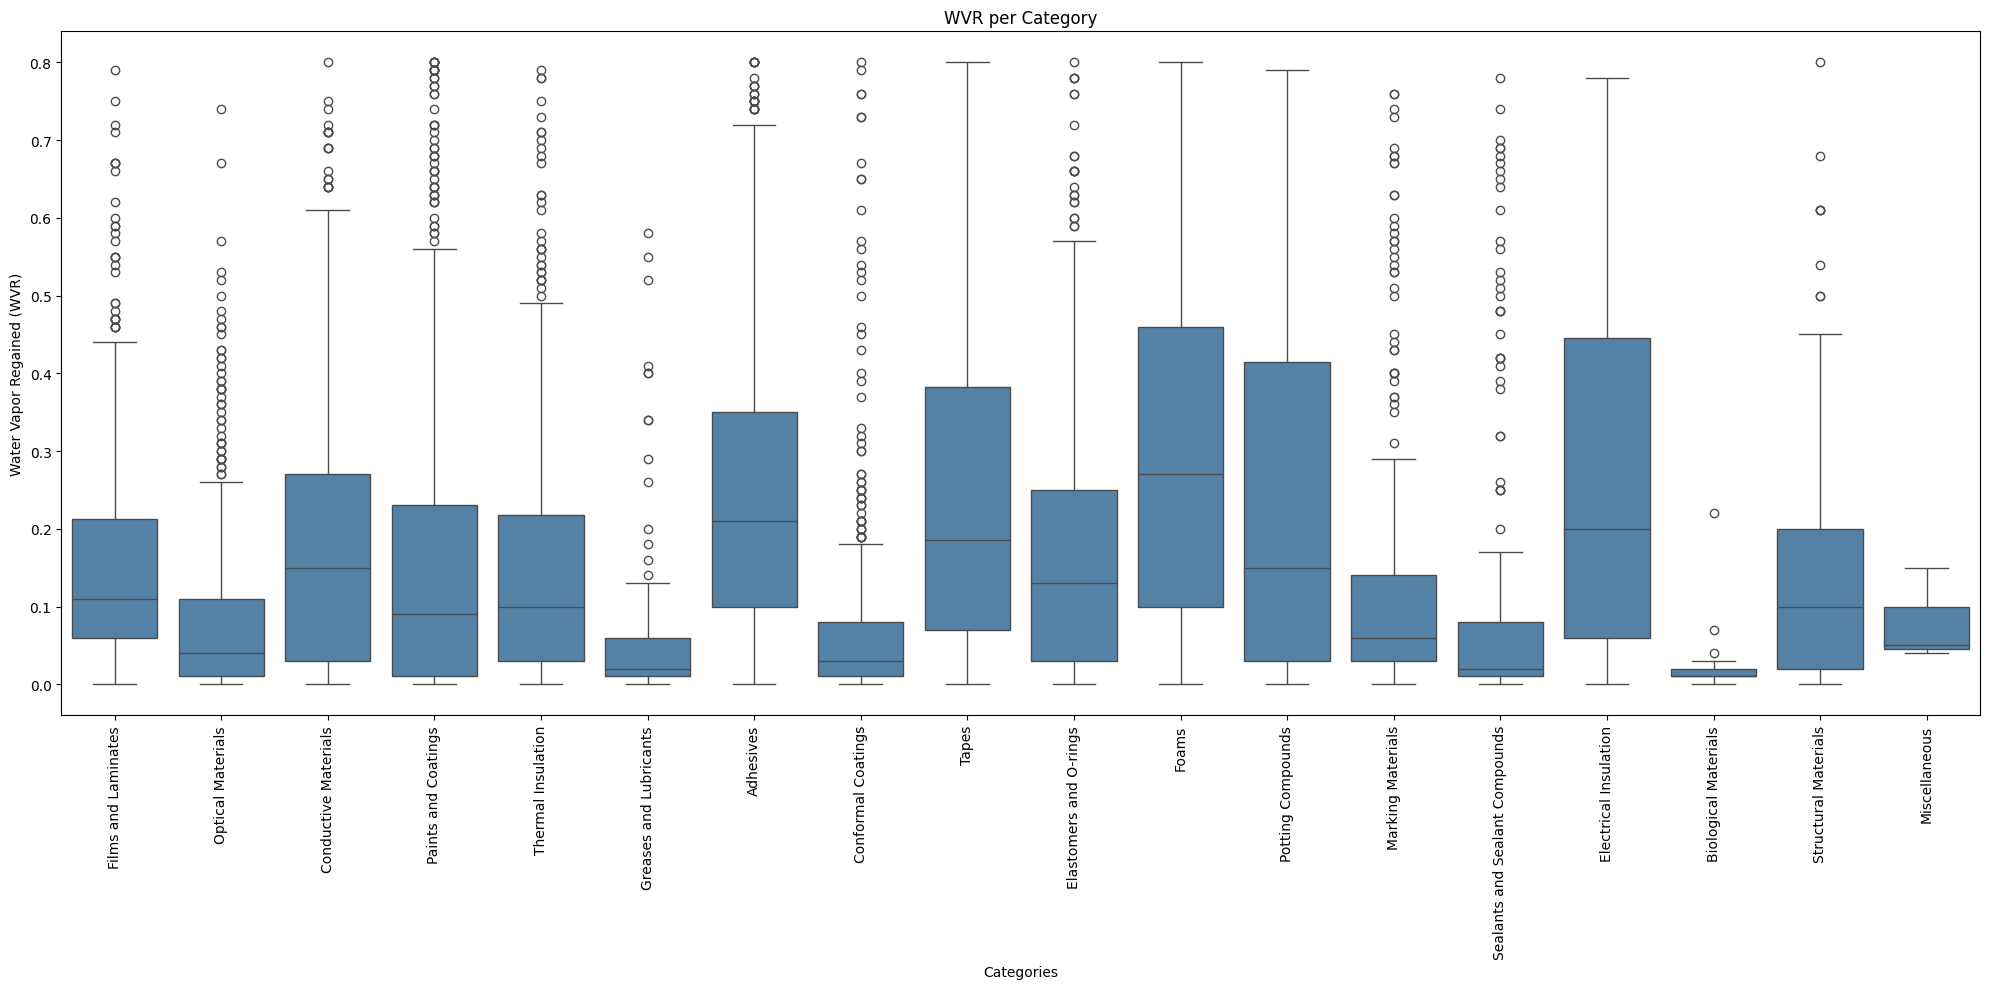

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(x='category_name', y='WVR', data=material_df, color='steelblue')
plt.title('WVR per Category')
plt.xlabel('Categories')
plt.ylabel('Water Vapor Regained (WVR)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The box plot highlights that Foams and Electrical Insulation have higher median WVR values, with significant variability and outliers. 
- Categories like Biological Materials and Miscellaneous have lower median WVR values and less variability, indicating consistent performance.

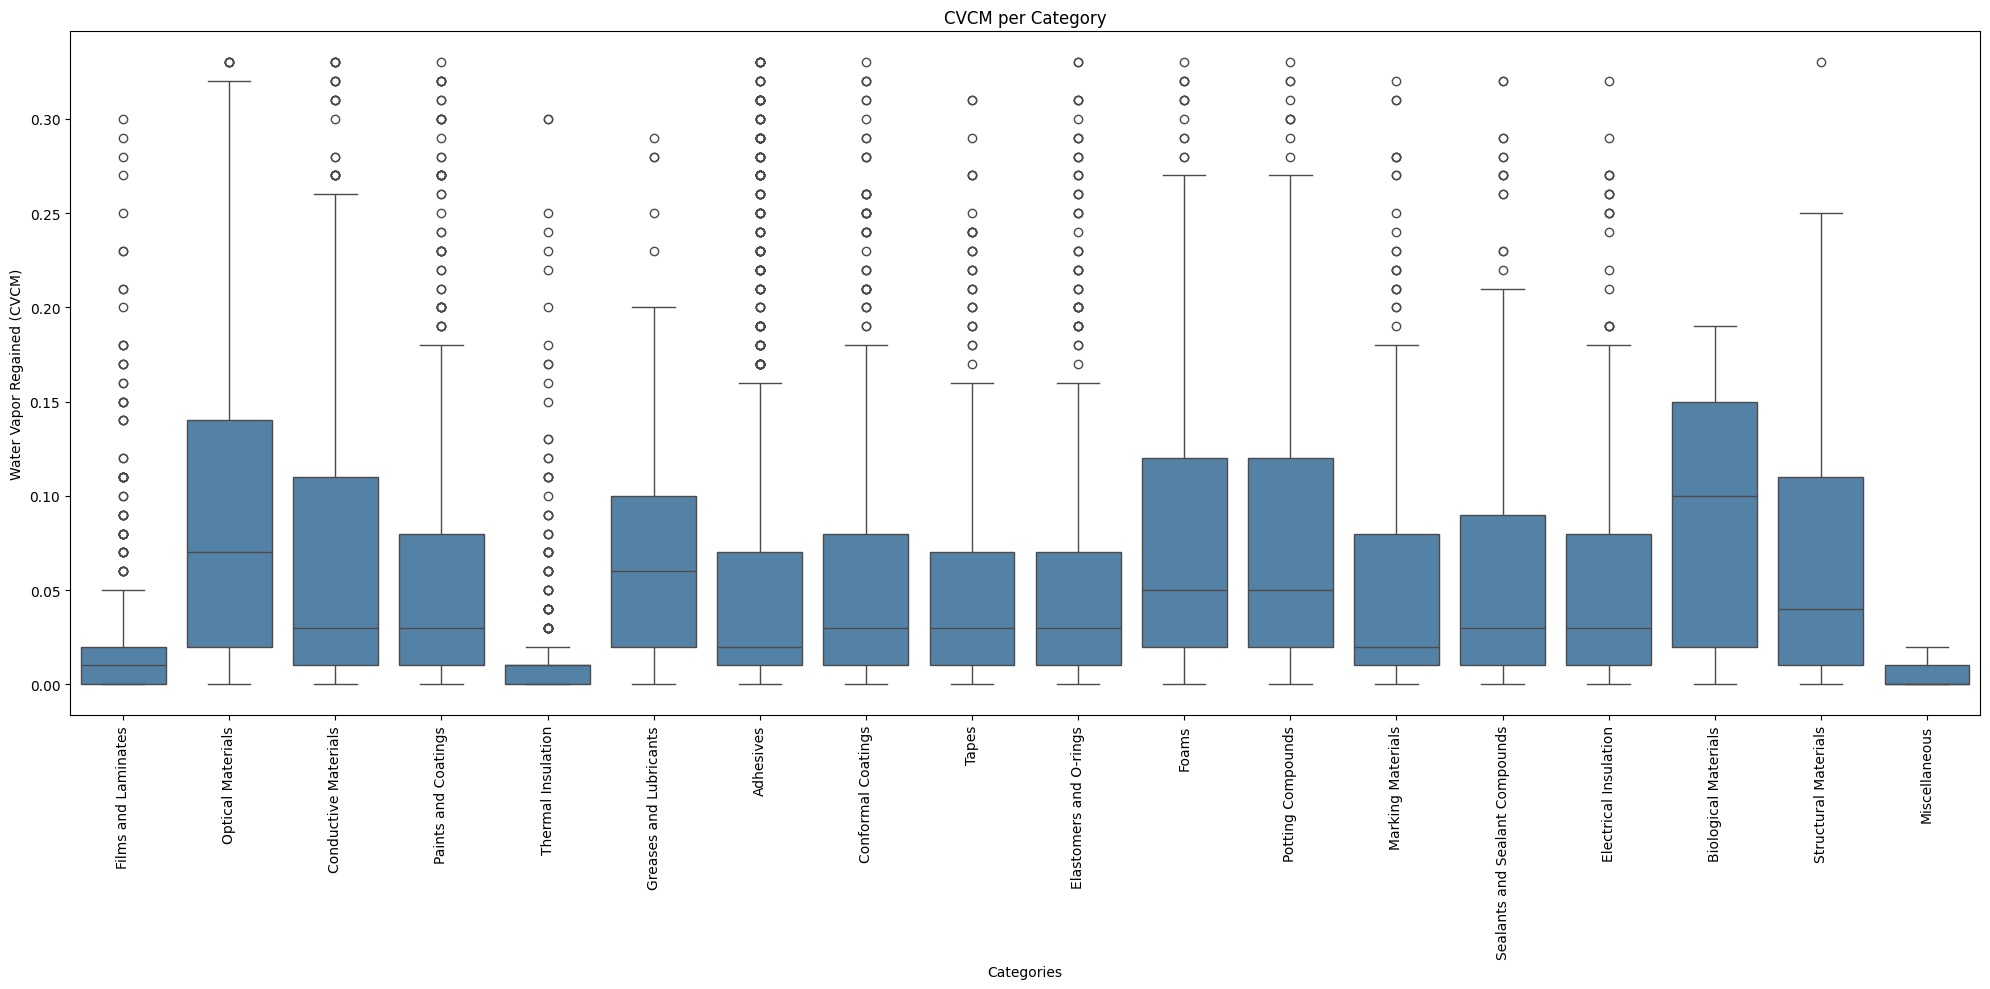

In [102]:
plt.figure(figsize=(20,10))
sns.boxplot(x='category_name', y='CVCM', data=material_df, color='steelblue')
plt.title('CVCM per Category')
plt.xlabel('Categories')
plt.ylabel('Water Vapor Regained (CVCM)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights for Material Performance Analysis

- Most materials exhibit low TML, CVCM, and WVR values, indicating their suitability for spacecraft use. High-performance materials are prevalent, with only a few exhibiting higher loss or regain values.

- **Foams and Electrical Insulation**: These categories consistently show higher average and median values for TML, WVR, and CVCM, suggesting they are less efficient in terms of material loss and moisture absorption.

- **Miscellaneous and Biological Materials**: These categories perform well across all metrics, with low average and median values for TML, WVR, and CVCM, indicating high efficiency and durability.


### Supplier Analysis

In [103]:
material_df['MFR']

0       CLB
1       CLB
2       PRS
3       MMM
4       DUN
       ... 
7554    DUP
7555    DUP
7556    UNN
7557    UNN
7558    DUP
Name: MFR, Length: 7559, dtype: object

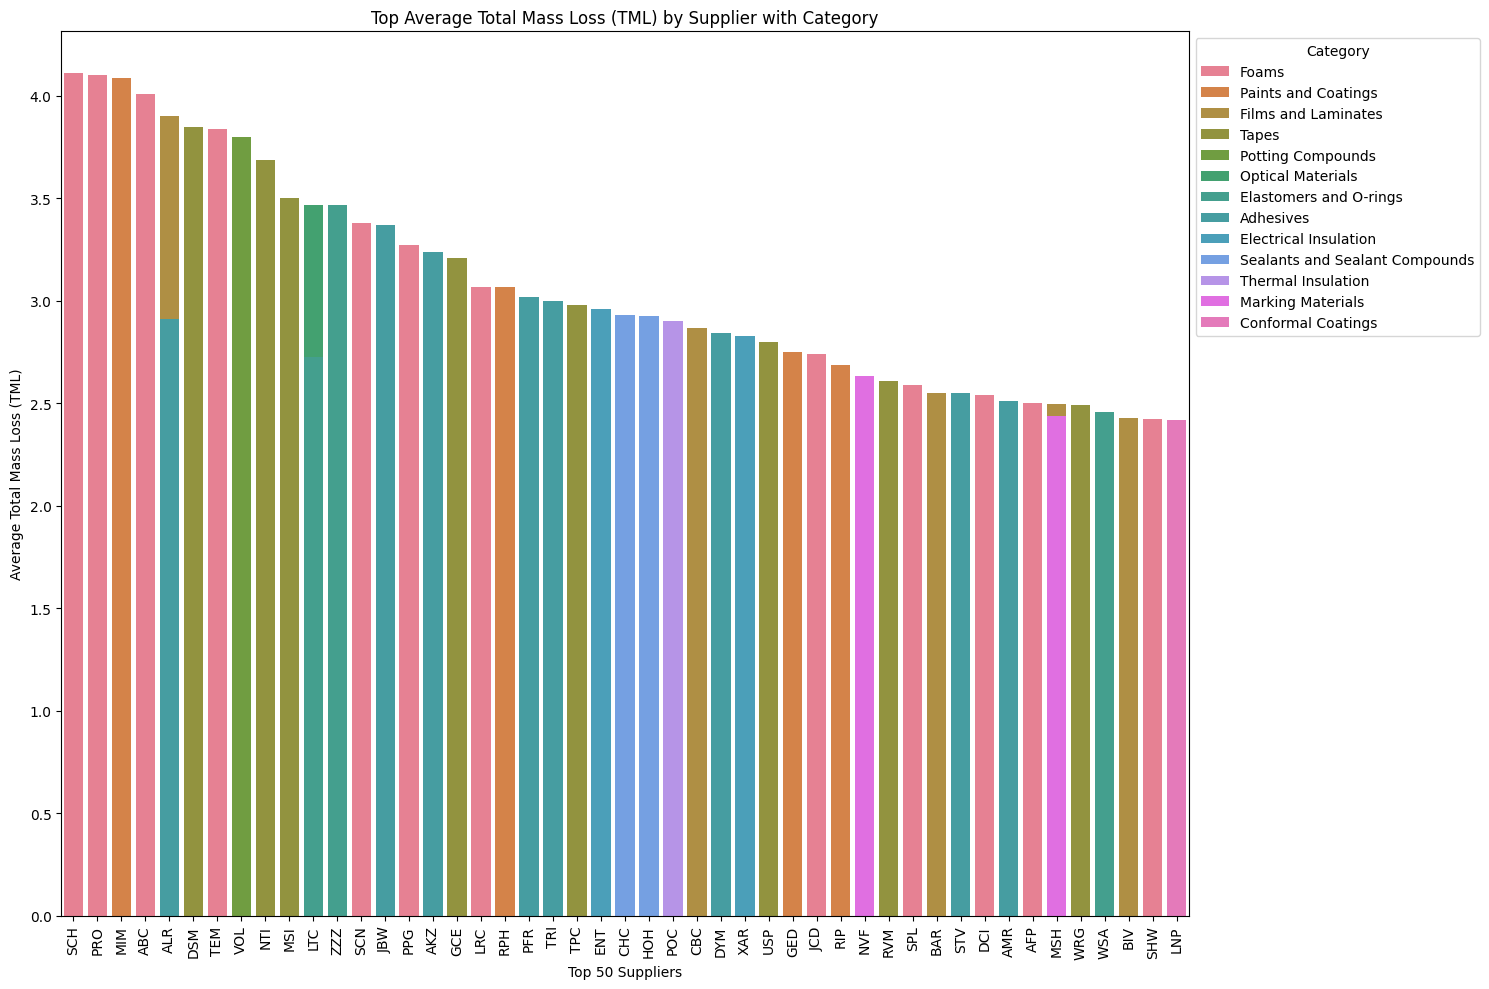

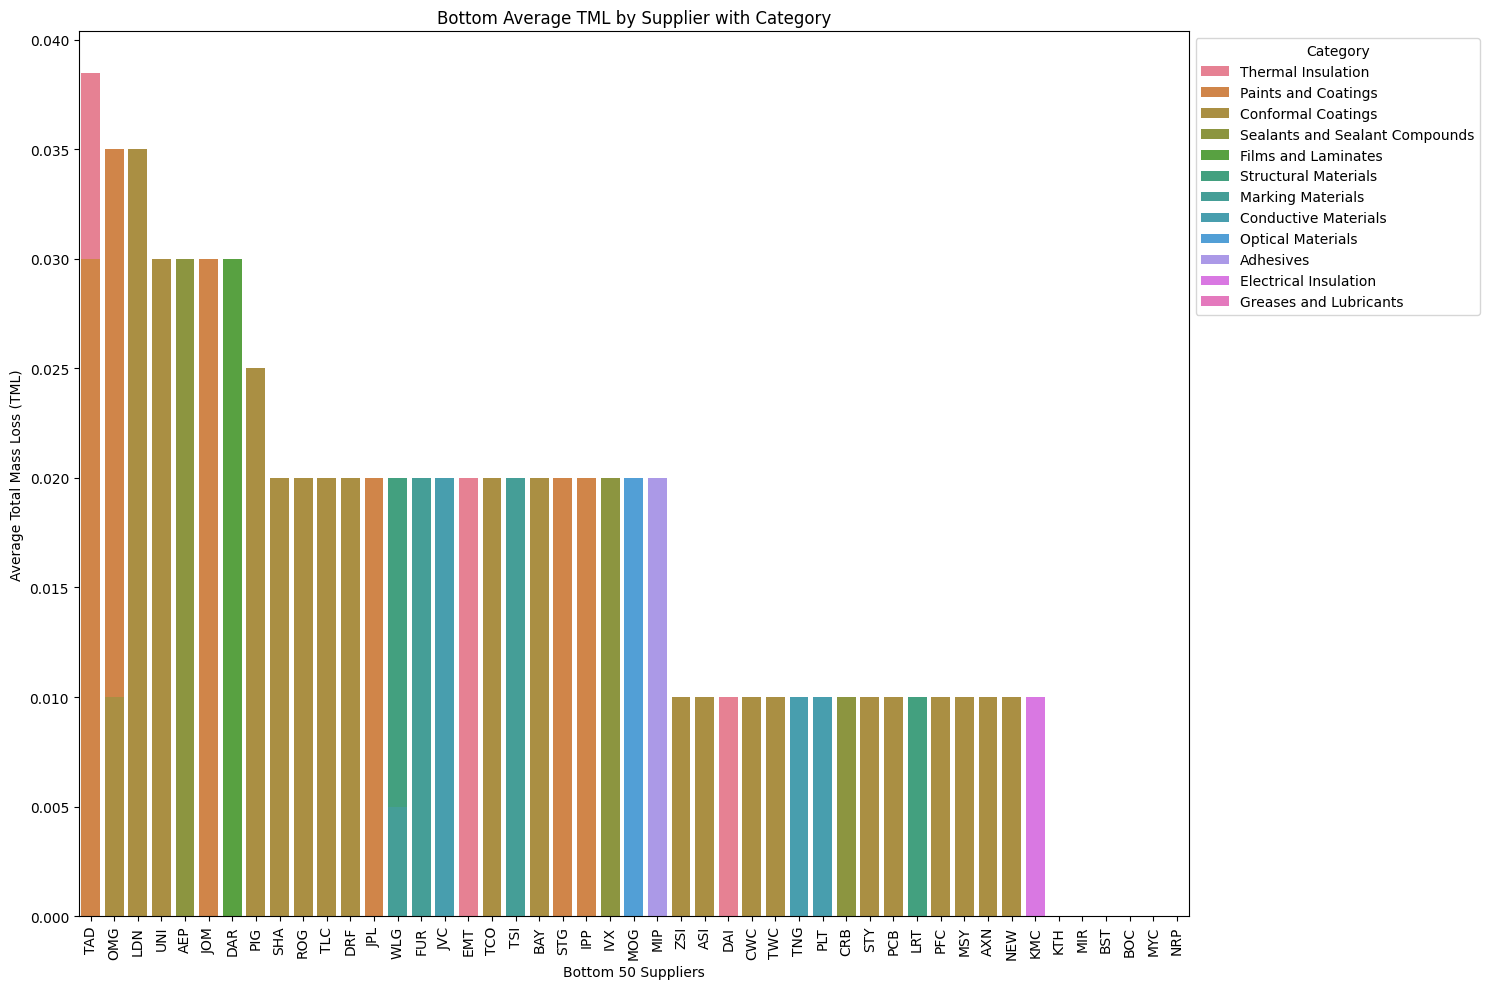

In [104]:

avg_TML_by_supplier = material_df.groupby(['MFR', 'category_name'])['TML'].mean().reset_index()
avg_TML_by_supplier = avg_TML_by_supplier.sort_values(by='TML', ascending=False)
#too many supplier - show top N items
# Filter for top N suppliers
N = 50
top_suppliers = avg_TML_by_supplier.head(N)
bottom_suppliers = avg_TML_by_supplier.tail(N)

plt.figure(figsize=(15, 10))
sns.barplot(x='MFR', y='TML', hue='category_name', data=top_suppliers, dodge=False)
plt.title('Top Average Total Mass Loss (TML) by Supplier with Category')
plt.xlabel('Top 50 Suppliers')
plt.ylabel('Average Total Mass Loss (TML)')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(x='MFR', y='TML', hue='category_name', data=bottom_suppliers, dodge=False)
plt.title('Bottom Average TML by Supplier with Category')
plt.xlabel('Bottom 50 Suppliers')
plt.ylabel('Average Total Mass Loss (TML)')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Suppliers in the top 50 have the highest TML, indicating materials with significant mass loss.
- Suppliers in the bottom 50 have the lowest TML, suggesting high-quality materials with minimal mass loss.

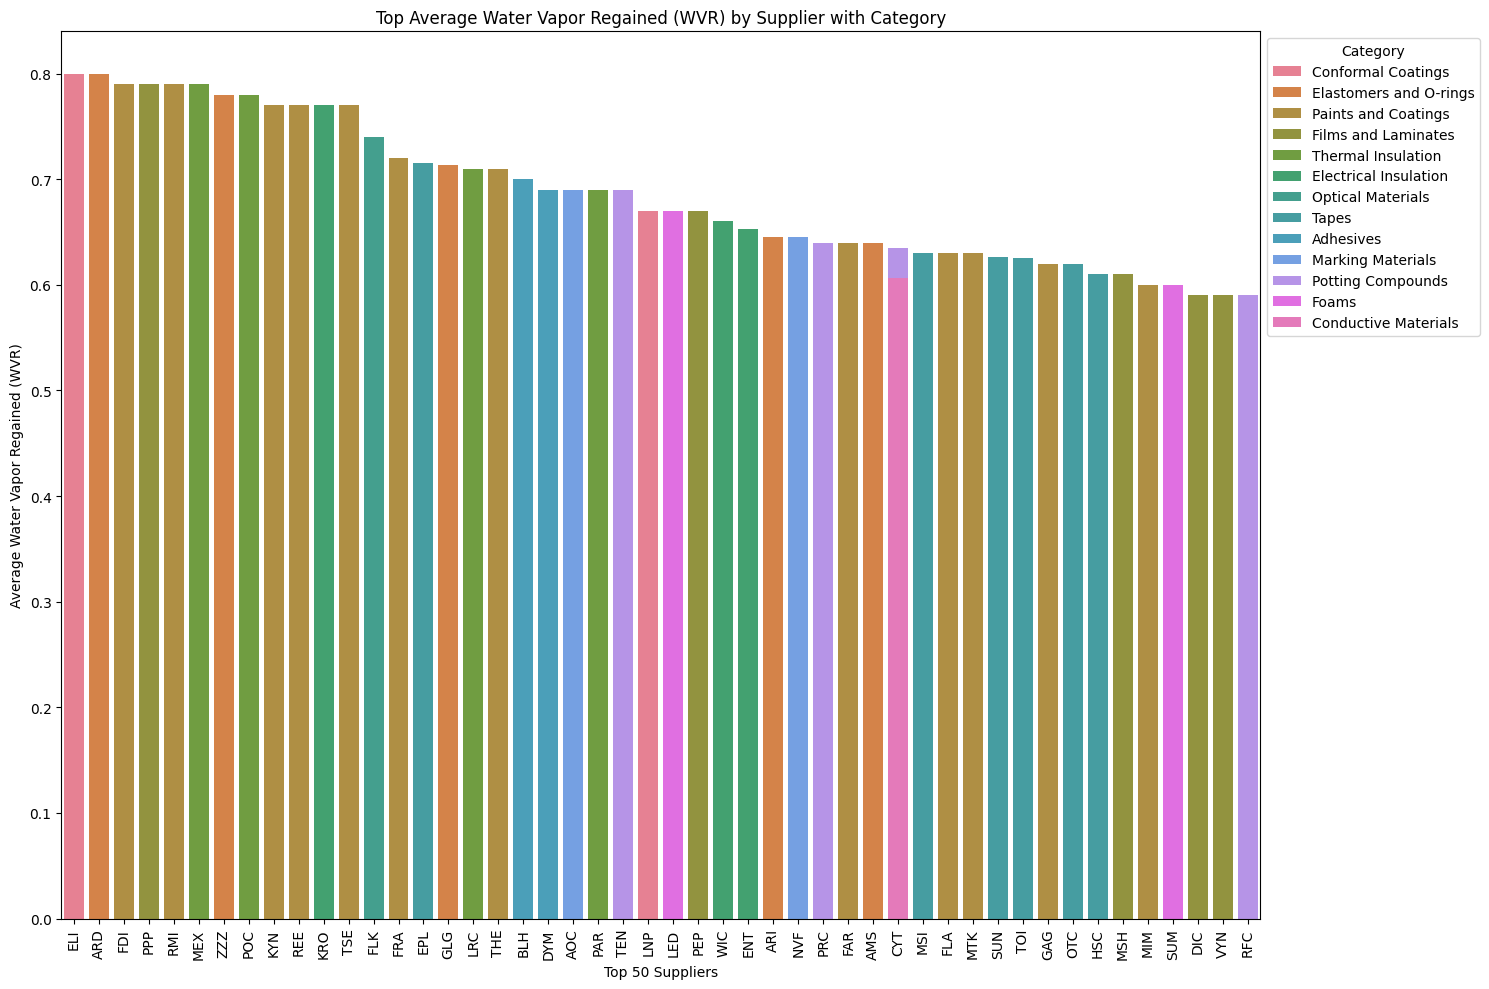

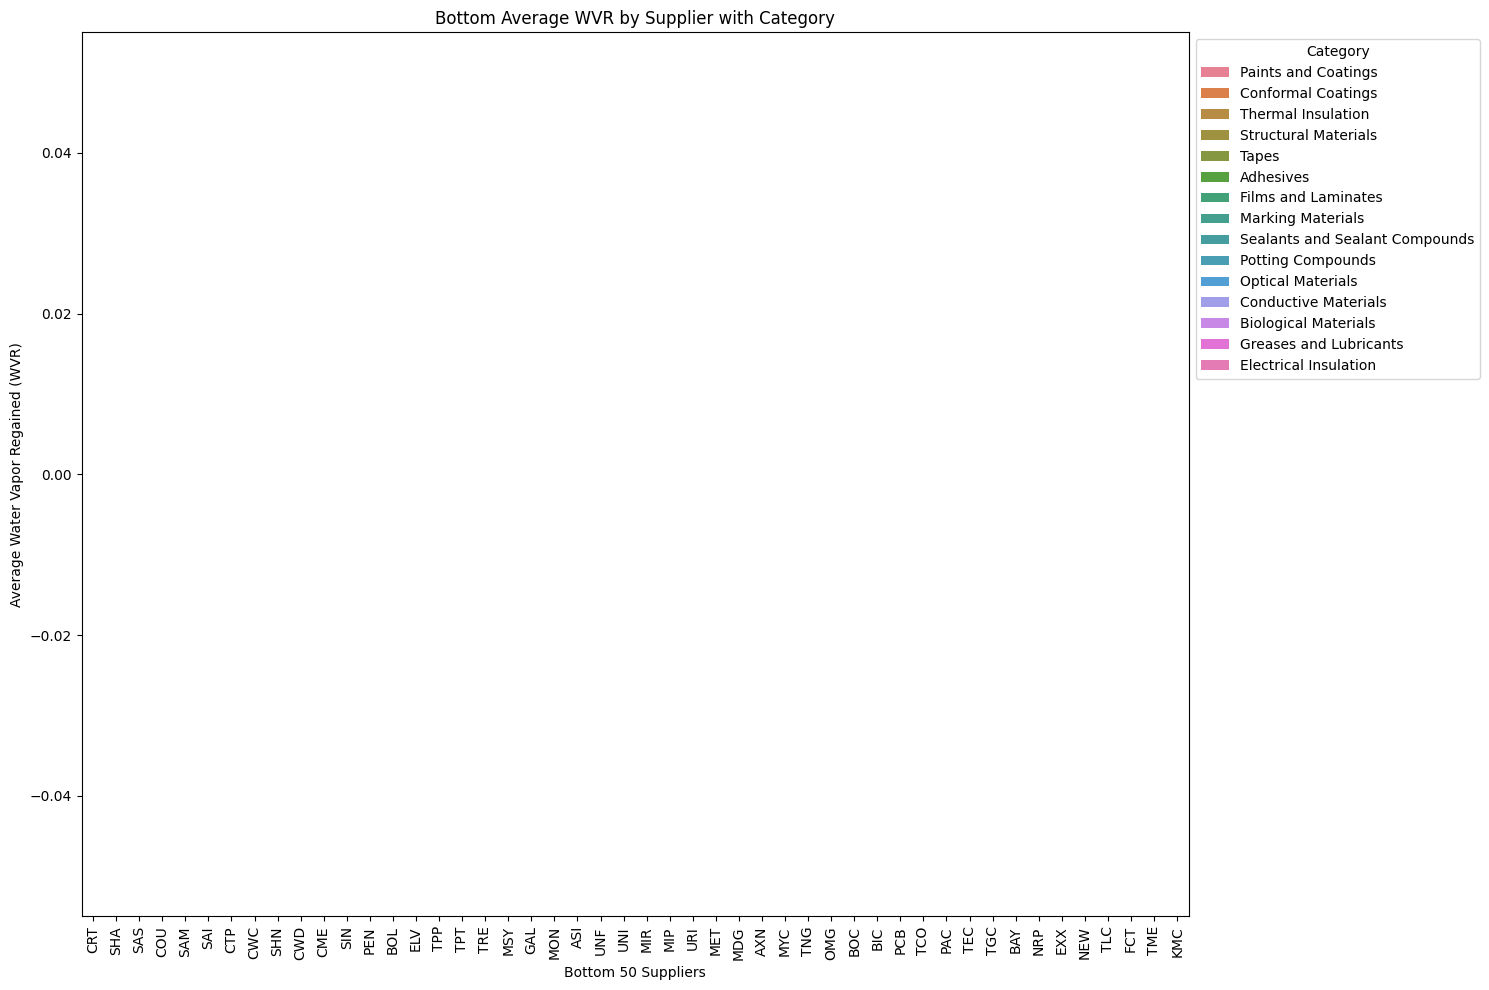

In [105]:
avg_WVR_by_supplier = material_df.groupby(['MFR', 'category_name'])['WVR'].mean().reset_index()
avg_WVR_by_supplier = avg_WVR_by_supplier.sort_values(by='WVR', ascending=False)
#too many supplier - show top N items
# Filter for top N suppliers
N = 50
top_suppliers = avg_WVR_by_supplier.head(N)
bottom_suppliers = avg_WVR_by_supplier.tail(N)

plt.figure(figsize=(15, 10))
sns.barplot(x='MFR', y='WVR', hue='category_name', data=top_suppliers, dodge=False)
plt.title('Top Average Water Vapor Regained (WVR) by Supplier with Category')
plt.xlabel('Top 50 Suppliers')
plt.ylabel('Average Water Vapor Regained (WVR)')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(x='MFR', y='WVR', hue='category_name', data=bottom_suppliers, dodge=False)
plt.title('Bottom Average WVR by Supplier with Category')
plt.xlabel('Bottom 50 Suppliers')
plt.ylabel('Average Water Vapor Regained (WVR)')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Suppliers in the top 50 have the highest WVR, indicating materials that absorb the most water vapor.
- Suppliers in the bottom 50 have materials that regain the least amount of water vapor.
- Overall most suppliers seem to show single category performance which means they are specialized suppliers

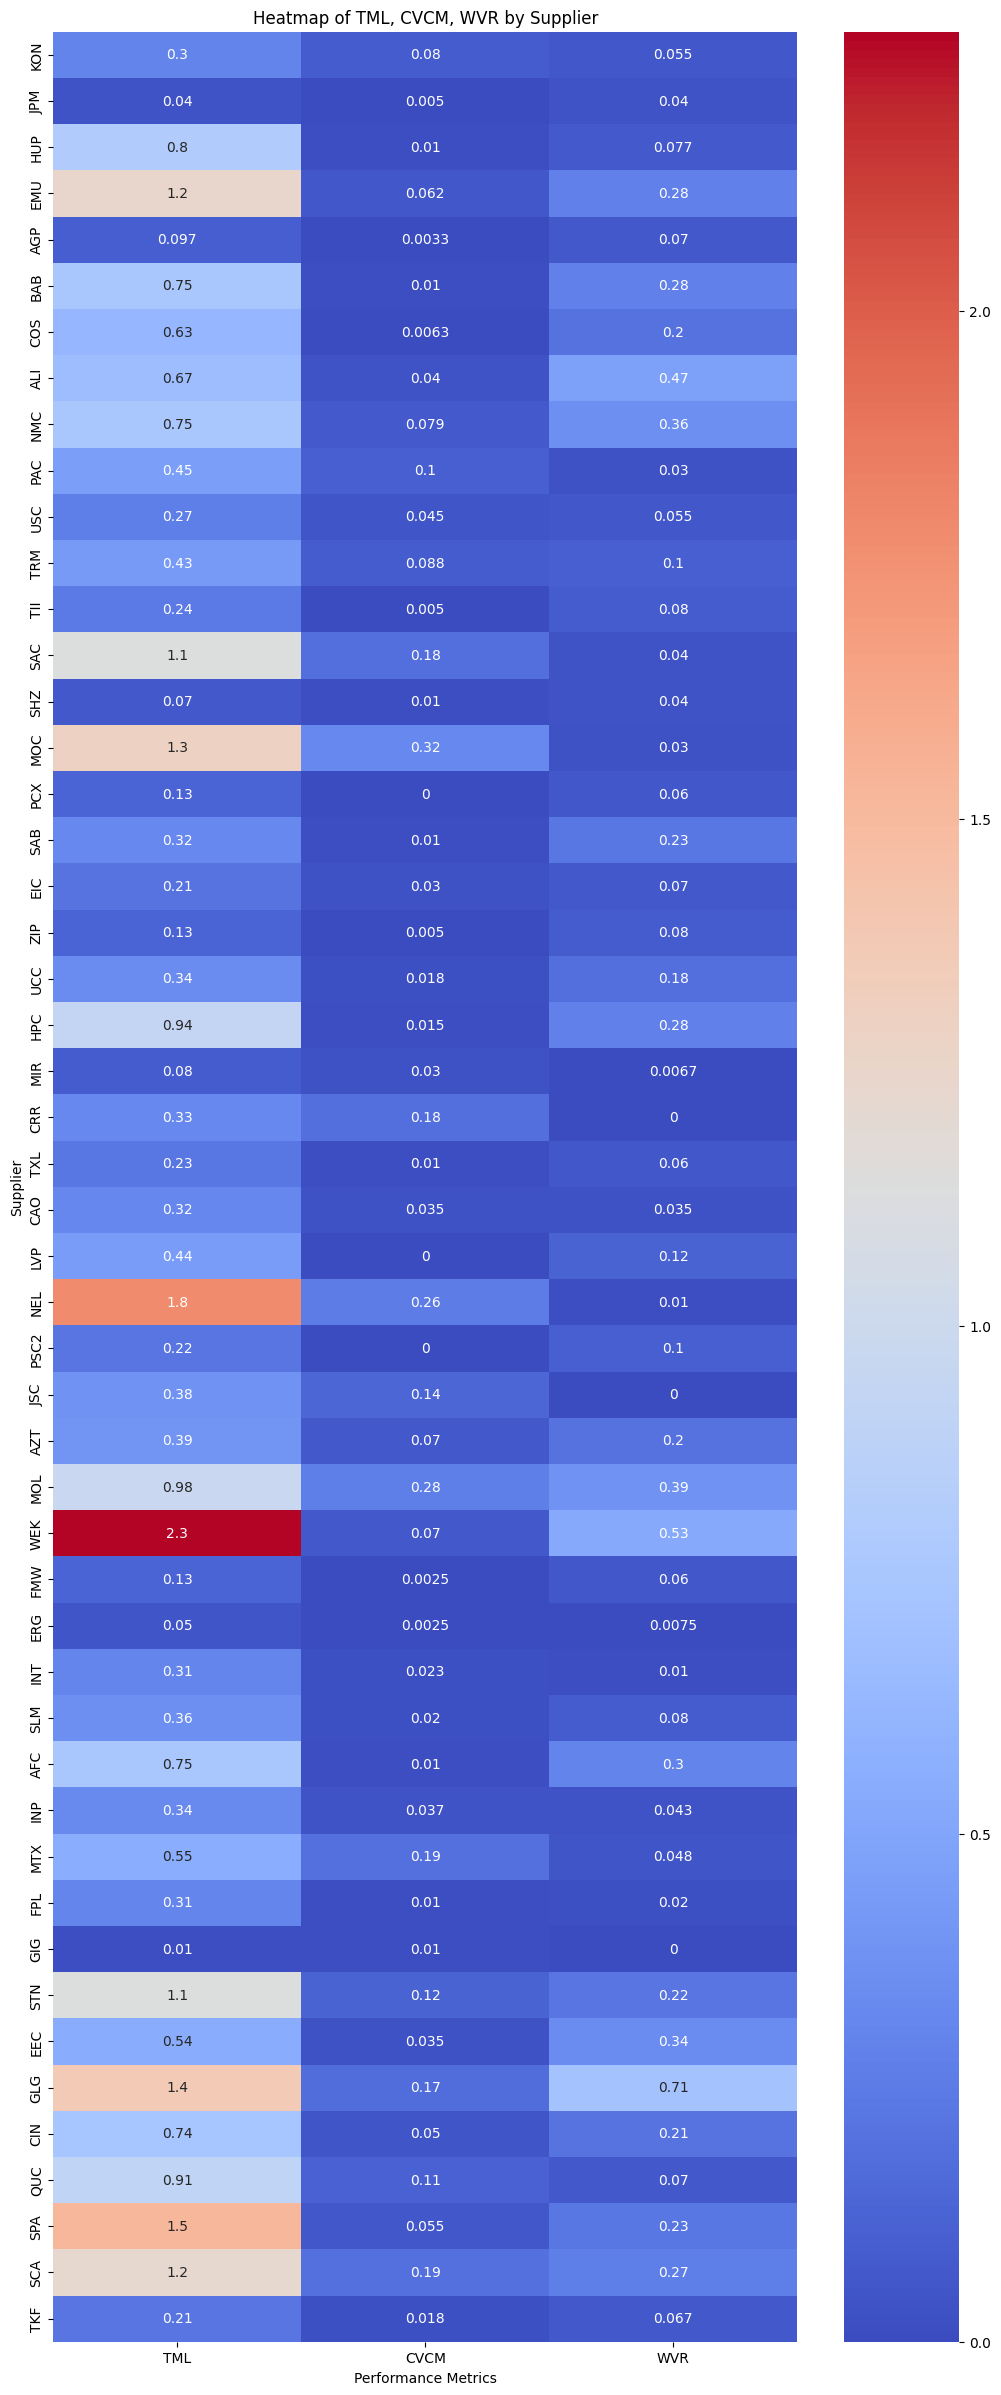

In [106]:
# Heatmap of TML, CVCM, WVR by supplier
supplier_performance = material_df.groupby('MFR')[['TML', 'CVCM', 'WVR']].mean()

# sampling as there are too many suppliers to fit onto graph.
N = 50
sample_suppliers = supplier_performance.sample(N)


plt.figure(figsize=(12, 30))
sns.heatmap(sample_suppliers, annot=True, cmap='coolwarm')
plt.title('Heatmap of TML, CVCM, WVR by Supplier')
plt.xlabel('Performance Metrics')
plt.yticks(rotation=90)
plt.ylabel('Supplier')
plt.show()


- the heatmap shows an overall comparison of TML, CVCM, and WVR across different suppliers.
- there are some correlation between TML and WVR, indicating that materials with higher TML tend to have higher WVR.
- CVCM show consistant overall low values across the sampled suppliers, with a few high values.

Material Usage Pattern

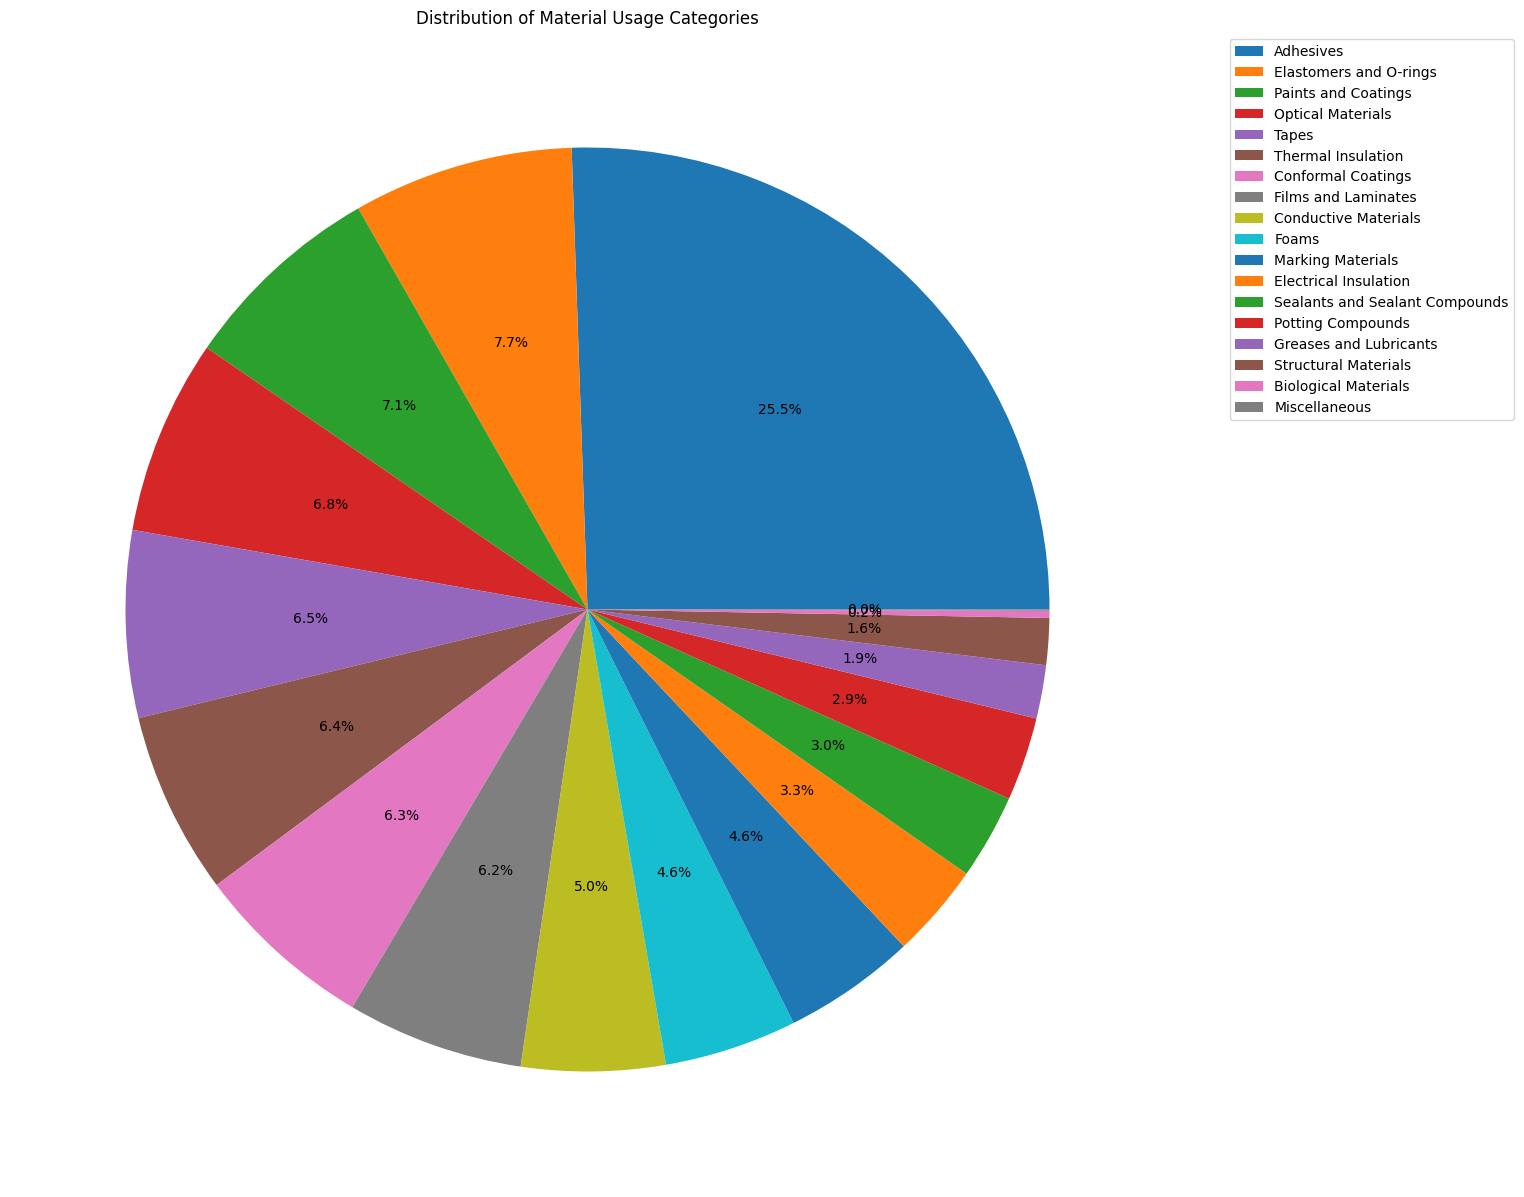

In [107]:
plt.figure(figsize=(15, 15))

material_usage_counts = material_df['category_name'].value_counts()

material_usage_counts.plot(kind='pie', autopct='%1.1f%%', labels=None)

plt.legend(material_usage_counts.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('')
plt.xlabel('')
plt.title('Distribution of Material Usage Categories')
plt.show()

- Adhesives make up the largest portion (25.5%), followed by Elastomers and O-rings (7.7%), and Paints and Coatings (7.1%).
- This distribution indicates the predominant use of certain materials, which might correlate with their performance metrics in the dataset.

### Insights for Suppplier Analysis

- **Material Selection:** Prioritize materials with low TML and WVR values for critical applications. 

- **Improvement Areas**: Suppliers with high TML and WVR, like SCH and ELI, should be targeted for improvements. Collaboration with these suppliers to enhance their material properties can lead to overall better performance.

- **Category Insights**: The diversity in performance across categories indicates that good quality is not limited to specific types of materials. However, focusing on the most used categories, like Adhesives, for optimization can have a significant positive impact.


# 4. **Findings and Insights**

- **TML and WVR Relationship**: The strong positive correlation between TML and WVR (0.57) indicates that materials prone to higher mass loss are also likely to absorb more water vapor. This suggests that efforts to reduce TML can concurrently reduce WVR, leading to materials that are both stable and moisture-resistant.

- **Consistent Performance Across Categories:** High-performing suppliers (low TML and WVR) provide materials across various categories, indicating that achieving high-quality materials is not restricted to specific material types. 

- This suggests **quality control measures** can be applied across the board to improve material performance.

- **Focus on High-Usage Categories:** The significant proportion of Adhesives (25.5%) in the material usage distribution highlights the importance of optimizing this category.



---



---



# END
For Modelling please find 'NASA_Materials_ML_Modelling.ipynb'


---



---